### ANGUS HUANG - IS602
SEMESTER PROJECTS
12/23/2016

[data source] ([https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)

![alt text](https://raw.githubusercontent.com/angus001/imagefile/master/patient_byage.jpg "Logo Title Text 1")

![alt text](https://raw.githubusercontent.com/angus001/imagefile/master/Readmission_byGender.jpg "Logo Title Text 1")

![alt text](https://raw.githubusercontent.com/angus001/imagefile/master/Readmission_ByWeight.png "Logo Title Text 1")

In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from pandas import ExcelWriter

*Point to the correct directory and load the data*

1. Remove NA from the CSV file.

In [2]:
os.chdir("C:\data")
ah_data=pd.read_csv("diabetic_data1.csv")
data_clean=ah_data.dropna()

In [3]:
data_clean.head(5)
data_clean.replace('?',0)
data_clean.dtypes #FIND the data type in each columns

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [4]:
cols_to_transform =['race','gender','age','weight','payer_code','medical_specialty',
'diag_1','diag_2','diag_3','max_glu_serum','A1Cresult','metformin','repaglinide',
'nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide',
'tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone',
'tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin',
'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone',
'change','diabetesMed','readmitted']

In [5]:
#Transform Categorical data into numerical data
data_clean1 = data_clean.copy()
cols_to_transform[1]
i = 0
for i in range(len(cols_to_transform)):
     colname = cols_to_transform[i]
     data_clean1[colname]=pd.Categorical(data_clean1[colname]).codes
     i=+1
data_clean1.iloc[1:4, 1:4]

,patient_nbr,race,gender
1,55629189,3,0
2,86047875,1,0
3,82442376,3,1


In [6]:
data_clean1.describe() #summarize the dataset

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,...,101766.0,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.598776,0.462443,6.096702,1.191361,2.024006,3.715642,5.754437,4.395987,...,0.0,1.405469,1.006898,0.000128,0.000010,0.000020,0.000010,0.538048,0.770031,1.427520
std,1.026403e+08,3.869636e+07,0.938415,0.498649,1.594084,1.147131,1.445403,5.280166,4.064081,2.985108,...,0.0,0.838798,0.084414,0.011302,0.003135,0.004433,0.003135,0.498553,0.420815,0.684068
min,1.252200e+04,1.350000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.496119e+07,2.341322e+07,3.000000,0.000000,5.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.523890e+08,4.550514e+07,3.000000,0.000000,6.000000,1.000000,1.000000,1.000000,7.000000,4.000000,...,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,2.302709e+08,8.754595e+07,3.000000,1.000000,7.000000,1.000000,3.000000,4.000000,7.000000,6.000000,...,0.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
max,4.438672e+08,1.895026e+08,5.000000,2.000000,9.000000,9.000000,8.000000,28.000000,25.000000,14.000000,...,0.0,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [7]:
#separate out features which will be used as independent variables
predictors = data_clean1[['race','gender','age','weight','payer_code','medical_specialty',
'diag_1','diag_2','diag_3','max_glu_serum','A1Cresult','metformin','repaglinide',
'nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide',
'tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone',
'tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin',
'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone',
'change','diabetesMed']]

In [8]:
type(predictors)

pandas.core.frame.DataFrame

In [13]:
#writer = ExcelWriter('output.xlsx')
data_clean1.to_csv('output.csv', sep=',')

In [20]:
data_clean2 = data_clean1.iloc[:, :]

In [21]:
predictors = data_clean2[['race','gender','age','weight','payer_code','medical_specialty',
'diag_1','diag_2','diag_3','max_glu_serum','A1Cresult','metformin','repaglinide',
'nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide',
'tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone',
'tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin',
'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone',
'change','diabetesMed']]

In [22]:
#this is the dependant variable or the target variable, separated out and
#saved into a pandas series which supposedly has better performance
targets = data_clean2.readmitted

In [23]:
targets.unique()

array([2, 1, 0], dtype=int64)

In [24]:
#break out the training set and testing set : predictor will have training & test
#so will targets and stored into series
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

In [25]:
#print out the data frame View with select columns and rows to double check
pred_train.iloc[1:4, :4]

,race,gender,age,weight
72205,3,0,7,1
88612,3,1,8,1
471,1,1,4,1


In [26]:
# build model on training data
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=25)
classifier = classifier.fit(pred_train, tar_train)
import sklearn.ensemble

In [27]:
#Test the model on the data set asides earlier
predictions = classifier.predict(pred_test)
len(tar_test),sum(tar_test)

(40707, 58049)

In [28]:
sklearn.metrics.confusion_matrix(tar_test, predictions)

array([[  136,  1539,  2882],
       [  262,  4897,  9092],
       [  304,  5191, 16404]])

In [29]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.52661704375168894

In [30]:
# fit an Extra Trees model to the data
model = sklearn.ensemble.ExtraTreesClassifier()
model.fit(pred_train, tar_train)
features_values=model.feature_importances_
print(model.feature_importances_)

[  3.94366108e-02   1.93551495e-02   9.69414929e-02   7.37787517e-03
   7.04152764e-02   7.49880119e-02   1.74520291e-01   1.70136026e-01
   1.73964053e-01   1.71636585e-02   3.19287383e-02   1.63167768e-02
   4.85693750e-03   2.82380535e-03   5.05983914e-04   1.04195180e-02
   1.77986880e-05   1.80659316e-02   1.59454215e-02   1.24577690e-04
   1.22220433e-02   1.11115921e-02   1.40494606e-03   2.71791371e-04
   1.68953332e-05   1.69699044e-04   0.00000000e+00   0.00000000e+00
   1.97356422e-02   2.63611839e-03   1.62692287e-04   0.00000000e+00
   5.70873597e-06   3.65918590e-06   4.66060556e-03   2.29467193e-03]


In [32]:
features_values1 = pd.DataFrame(features_values)
pred_train.columns.values

array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
       'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
       'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed'], dtype=object)

In [33]:
df3 = pd.DataFrame(features_values)
df4 = pd.DataFrame(features_values, index=pred_train.columns)
df5 = pd.DataFrame(df4)
df5.columns = ['Features_Values']
df5.sort_values(['Features_Values'], ascending=[0])

,Features_Values
diag_1,0.174520
diag_3,0.173964
diag_2,0.170136
age,0.096941
medical_specialty,0.074988
payer_code,0.070415
race,0.039437
A1Cresult,0.031929
insulin,0.019736
gender,0.019355


*The 2nd major part of the analysis*
 
To decides how many trees are effient to make the prediction

In [34]:
trees = range(50)
accuracy = np.zeros(50)

In [35]:
for idx in range(len(trees)):
    classifier = RandomForestClassifier(n_estimators = idx + 1)
    classifier = classifier.fit(pred_train, tar_train)
    predictions = classifier.predict(pred_test)
    accuracy[idx] = sklearn.metrics.accuracy_score(tar_test, predictions)

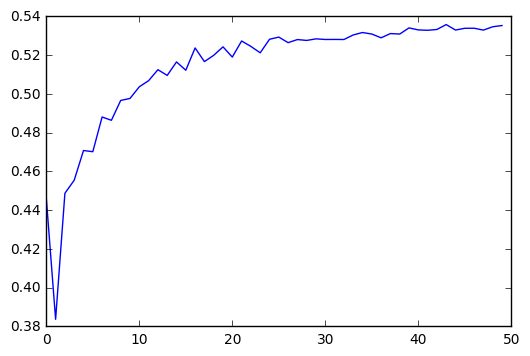

In [36]:
plt.cla()
plt.plot(trees, accuracy)
plt.show()

## CONCLUSION

* A lot of data points are categorical data, 45 out of 50 has to be converted to numerical values
* The prediction is merely better than 53%
* The model does show the factors that could highly correlate with are the diagnoses the patients were initially admitted for
* Future study could examine how to more effectively analyze the categorical data points and whether readmission after 30 days should be included in the studies.